I will be primarily using the modules provided by the author of ThinkStats2 to maintain consistency.<br>
The modules and data needed for this exercise are included in the same directory as this file.

In [24]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

#modules from ThinkStats2
import nsfg
import first
import thinkstats2
import thinkplot

First, we import the data from the directory, narrowing it down to live births

In [20]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

To check if we imported the data correctly, we generate a histogram plot just like the author. <br>
It is exactly identical to the one provided by the author.

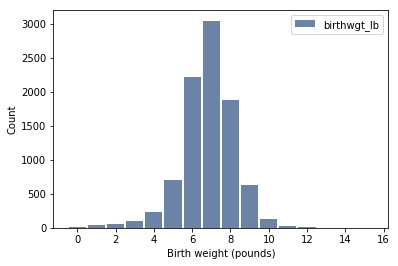

In [25]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

We split the live births into two groups defined by whether the birth produced by a couple is their first or not. <br>
The first birth produced by a couple is denoted as first while non-first births are defined as others.

In [30]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

We now produce a helper function to compute Cohen's effect size. <br>
This compares the difference between two groups to the variability within their group. <br>
In terms of statistics, it is the difference in means expressed in number of standard deviations:

In [19]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

The question asks us to compute Cohen's effect size for the totalwgt_lb of the first and non-first births. <br>
Fortunately, we have an attribute totalwgt_lb already given to us. <br>
We calculate the respective means of the first and non-first births as a sanity check. <br>
The difference between the two births seems small.

In [31]:
firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()

(7.201094430437772, 7.325855614973262)

We call the helper function we wrote for Cohen's Effect Size on the totalwgt_lb for the first and non-first births. <br> 
The difference between the two seem trivial, with a Cohen's effect size value of 0.2 usually indicating a small effect.  

In [28]:
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.08867292707260174